# **Project Name-** Bird species observation analysis

# **Project Summary-**

The Bird Species Observation Analysis project investigates how environmental factors shape the diversity and distribution of bird species in two distinct ecosystems: forests and grasslands. By leveraging observational datasets that record bird species occurrences, this study aims to uncover habitat-specific patterns, identify species preferences, and evaluate biodiversity levels in both environments.

The objectives of this analysis is to-

1. Compare bird species richness and abundance between forest and grassland ecosystems.

2. Assess how vegetation type, climate, and terrain influence bird community structures.

3. Identify species with strong habitat preferences or adaptability across both ecosystems.

4. Provide data-driven insights to support conservation planning and biodiversity management.

The study explores seasonal and temporal trends, species activity patterns, and environmental correlations, while also considering conservation priorities. The findings will help guide targeted conservation strategies, habitat management, and biodiversity monitoring programs.

# **Github Link-**

https://github.com/Drishanv/Bird-species-observation-analysis

# **Problem statement**-

The project aims to analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands. By examining bird species observations across these habitats, the goal is to understand how environmental factors, such as vegetation type, climate, and terrain, influence bird populations and their behavior. The study will involve working on the provided observational data of bird species present in both ecosystems, identifying patterns of habitat preference, and assessing the impact of these habitats on bird diversity. The findings can provide valuable insights into habitat conservation, biodiversity management, and the effects of environmental changes on avian communities.


# **Data Wrangling (Import Libraries and Data)**

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
# load datasets

forestdf = pd.read_excel('Bird_Monitoring_Data_FOREST.XLSX')
grasslanddf = pd.read_excel('Bird_Monitoring_Data_GRASSLAND.XLSX')

In [ ]:
# Adding new column habitat to distinguish between two datasets

forestdf['Habitat'] = 'Forest'
grasslanddf['Habitat'] = 'Grassland'

In [ ]:
# Combine two datasets

combined_df = pd.concat([forestdf, grasslanddf], ignore_index=True)

In [ ]:
# Convert date column for temporal analysis

combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

In [ ]:
# checking combined dataframe

combined_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


# **Dataset Description**-

The dataset contains observational data for bird species recorded across multiple forest sites. It includes detailed columns describing location, observation methods, bird species, and environmental conditions.

1. **Admin_Unit_Code:** The code for the administrative unit (e.g., "ANTI") where the observation was conducted.
2. **Sub_Unit_Code:** The sub-unit within the administrative unit for further classification.
3. **Site_Name:** The name of the specific observation site within the unit.
4. **Plot_Name:** A unique identifier for the specific plot where observations were recorded.
5. **Location_Type:** The habitat type of the observation area (e.g., "Forest").
6. **Year:** The year in which the observation took place.
7. **Date** – Exact date of the observation.  
8. **Start_Time** – Start time of the observation session.  
9. **End_Time** – End time of the observation session.  
10. **Observer** – Individual who conducted the observation.  
11. **Visit** – Count of visits made to the same observation site or plot.  
12. **Interval_Length** – Duration of the observation interval (e.g., `"0-2.5 min"`).  
13. **ID_Method** – Method used to identify the species (e.g., `"Singing"`, `"Calling"`, `"Visualization"`).  
14. **Distance** – Distance of the observed species from the observer (e.g., `<= 50 Meters`).  
15. **Flyover_Observed** – Indicates whether the bird was observed flying overhead (`TRUE`/`FALSE`).  
16. **Sex** – Sex of the observed bird (e.g., `Male`, `Female`, `Undetermined`).  
17. **Common_Name** – Common name of the observed bird species (e.g., `"Eastern Towhee"`).  
18. **Scientific_Name** – Scientific name of the observed bird species (e.g., *Pipilo erythrophthalmus*).  
19. **AcceptedTSN** – Taxonomic Serial Number for the observed species.  
20. **NPSTaxonCode** – Unique code assigned to the taxon of the species.  
21. **AOU_Code** – American Ornithological Union code for the species.  
22. **PIF_Watchlist_Status** – Indicates whether the species is on the Partners in Flight Watchlist (`TRUE` for at-risk species).  
23. **Regional_Stewardship_Status** – Denotes the conservation priority within the region (`TRUE`/`FALSE`).  
24. **Temperature** – Temperature recorded at the time of observation (in degrees).  
25. **Humidity** – Humidity percentage recorded at the time of observation.  
26. **Sky** – Sky condition during the observation (e.g., `"Cloudy/Overcast"`).  
27. **Wind** – Wind condition (e.g., `"Calm (< 1 mph) smoke rises vertically"`).  
28. **Disturbance** – Notes any disturbances that could affect the observation (e.g., `"No effect on count"`).  
29. **Initial_Three_Min_Cnt** – Count of the species observed in the first three minutes of the session.  

In [ ]:
# info of the combined dataframe

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              3921 non-null   object        
 1   Sub_Unit_Code                0 non-null      float64       
 2   Site_Name                    333 non-null    object        
 3   Plot_Name                    3921 non-null   object        
 4   Location_Type                3921 non-null   object        
 5   Year                         3921 non-null   int64         
 6   Date                         3921 non-null   datetime64[ns]
 7   Start_Time                   3921 non-null   object        
 8   End_Time                     3921 non-null   object        
 9   Observer                     3921 non-null   object        
 10  Visit                        3921 non-null   int64         
 11  Interval_Length              3921 non-null 

In [ ]:
# knowing the statistical information of combined dataframe

combined_df.describe()

,Sub_Unit_Code,Year,Date,Visit,AcceptedTSN,NPSTaxonCode,Temperature,Humidity,TaxonCode
count,0.0,3921.0,3921,3921.000000,3900.000000,333.000000,3921.000000,3921.000000,3587.000000
mean,NaN,2018.0,2018-06-18 17:42:49.854628608,1.904616,197964.171026,112177.567568,23.981051,68.737822,102455.164483
min,NaN,2018.0,2018-05-22 00:00:00,1.000000,174999.000000,82737.000000,12.900000,32.900002,76625.000000
25%,NaN,2018.0,2018-05-24 00:00:00,1.000000,178581.000000,85791.000000,21.000000,59.000000,84790.000000
50%,NaN,2018.0,2018-06-25 00:00:00,2.000000,179150.000000,88071.000000,23.799999,69.000000,87391.000000
75%,NaN,2018.0,2018-07-13 00:00:00,3.000000,179443.000000,94228.000000,26.799999,79.900002,94215.000000
max,NaN,2018.0,2018-07-19 00:00:00,3.000000,950052.000000,926917.000000,37.299999,93.300003,926917.000000
std,NaN,0.0,NaN,0.804694,88745.469586,88740.680703,4.936211,13.854467,84034.740715


# **Data cleaning**-

In [ ]:
# checking the null values

combined_df.isnull().sum()

,0
Admin_Unit_Code,0
Sub_Unit_Code,3921
Site_Name,3588
Plot_Name,0
Location_Type,0
Year,0
Date,0
Start_Time,0
End_Time,0
Observer,0


In [ ]:
# Fill missing sub_unit code with unknown

combined_df['Sub_Unit_Code'].fillna('Unknown', inplace=True)

In [ ]:
# Drop duplicates

combined_df.drop_duplicates(inplace=True)

In [ ]:
# Handle missing categorical data

categorical_cols = combined_df.select_dtypes(include='object').columns
for col in categorical_cols:
    combined_df[col] = combined_df[col].fillna('Unknown')

In [ ]:
# Handle missing numeric data

numeric_cols = combined_df.select_dtypes(include='number').columns
for col in numeric_cols:
    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

In [ ]:
# checking whether the null values are handled or not

combined_df.isnull().sum()

,0
Admin_Unit_Code,0
Sub_Unit_Code,0
Site_Name,0
Plot_Name,0
Location_Type,0
Year,0
Date,0
Start_Time,0
End_Time,0
Observer,0


# **Data Visualization-**

# **Temporal Analysis**-

# **Analyze the Date and Year columns to detect patterns in bird sightings across different seasons or years.**

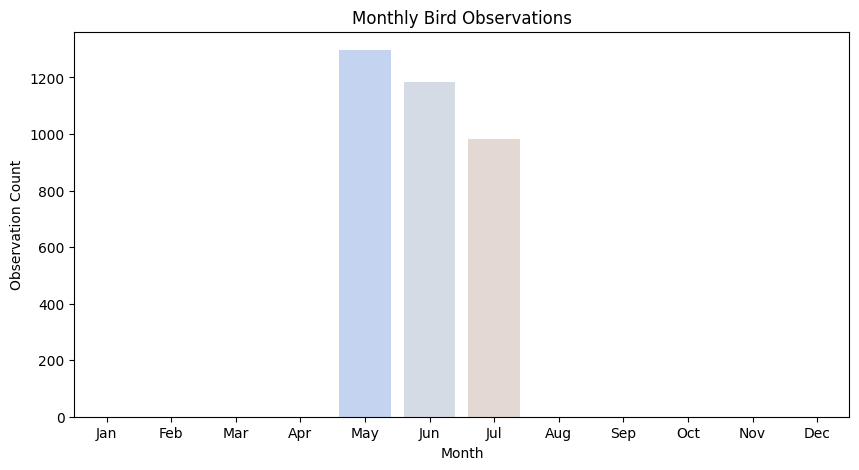

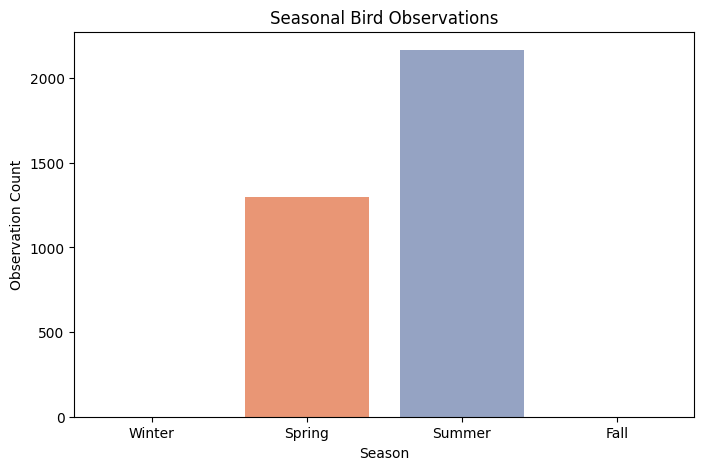

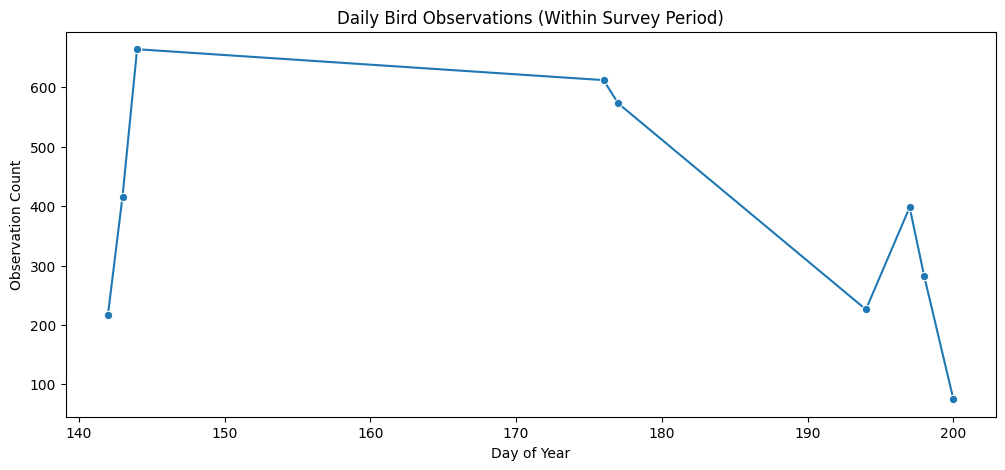

In [ ]:
# Ensure Date column is datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Extract Month, Year, and Day-of-Year
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['DayOfYear'] = combined_df['Date'].dt.dayofyear

# =====================
# 1. Monthly Observation Count
# =====================
seasonal_counts = combined_df.groupby('Month').size()
seasonal_counts = seasonal_counts.reindex(range(1, 13), fill_value=0)  # Ensure all months

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette="coolwarm")
plt.title('Monthly Bird Observations')
plt.xlabel('Month')
plt.ylabel('Observation Count')
plt.xticks(ticks=range(0, 12), labels=month_labels)
plt.show()

# =====================
# 2. Seasonal Observation Count
# =====================
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_df['Season'] = combined_df['Month'].apply(month_to_season)
season_counts = combined_df.groupby('Season').size().reindex(['Winter', 'Spring', 'Summer', 'Fall'], fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="Set2")
plt.title('Seasonal Bird Observations')
plt.xlabel('Season')
plt.ylabel('Observation Count')
plt.show()

# =====================
# 3. Daily Trend Within the Year
# =====================
daily_counts = combined_df.groupby('DayOfYear').size()

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')
plt.title('Daily Bird Observations (Within Survey Period)')
plt.xlabel('Day of Year')
plt.ylabel('Observation Count')
plt.show()

# **Findings-**

1. **Monthly Bird Observations:** Bird sightings were recorded only between May and July, peaking in May, then gradually decreasing towards July.

2. **Seasonal Bird Observations:** Spring and Summer are the only active survey seasons, with Summer having the highest observation counts.

3. **Daily Bird Observations (Within Survey Period):** Daily counts show sharp fluctuations, with a high peak early in the survey (around Day 145) and a gradual decline, followed by small mid-season spikes.

# **Study the Start_Time and End_Time to determine if specific time windows correlate with higher bird activity.**

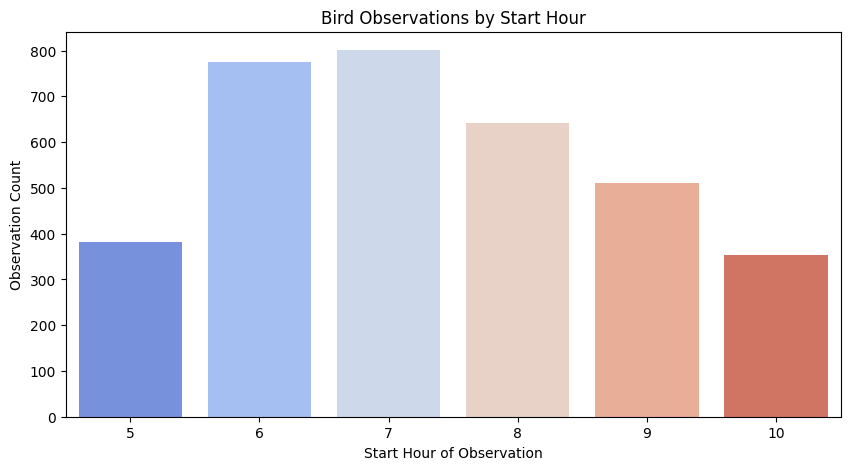

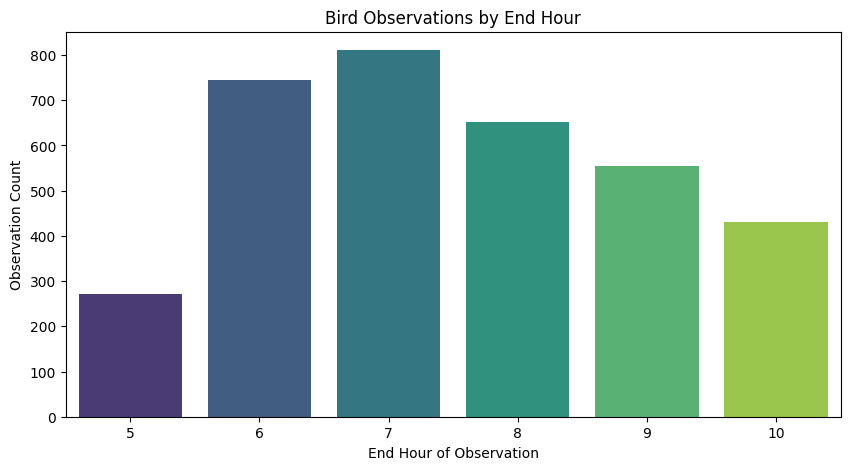

In [ ]:
# Convert to datetime.time objects
combined_df['Start_Time'] = pd.to_datetime(combined_df['Start_Time'], format='%H:%M:%S').dt.hour
combined_df['End_Time'] = pd.to_datetime(combined_df['End_Time'], format='%H:%M:%S').dt.hour

# Group by hour to count observations
start_counts = combined_df.groupby('Start_Time').size()
end_counts = combined_df.groupby('End_Time').size()

# Plot Start Time activity
plt.figure(figsize=(10, 5))
sns.barplot(x=start_counts.index, y=start_counts.values, palette="coolwarm")
plt.title('Bird Observations by Start Hour')
plt.xlabel('Start Hour of Observation')
plt.ylabel('Observation Count')
plt.show()

# Plot End Time activity
plt.figure(figsize=(10, 5))
sns.barplot(x=end_counts.index, y=end_counts.values, palette="viridis")
plt.title('Bird Observations by End Hour')
plt.xlabel('End Hour of Observation')
plt.ylabel('Observation Count')
plt.show()

# **Findings-**

1. **Start Time Trend:** Most bird observations occurred during early morning hours (5–8 AM), aligning with typical peak bird activity times.

2. **End Time Trend:** Observation sessions usually ended before 10 AM, suggesting surveys were concentrated in the morning to capture active bird behavior.

# **Spatial Analysis**

# **Group data by Location_Type (e.g., Grassland) to identify biodiversity hotspots.**

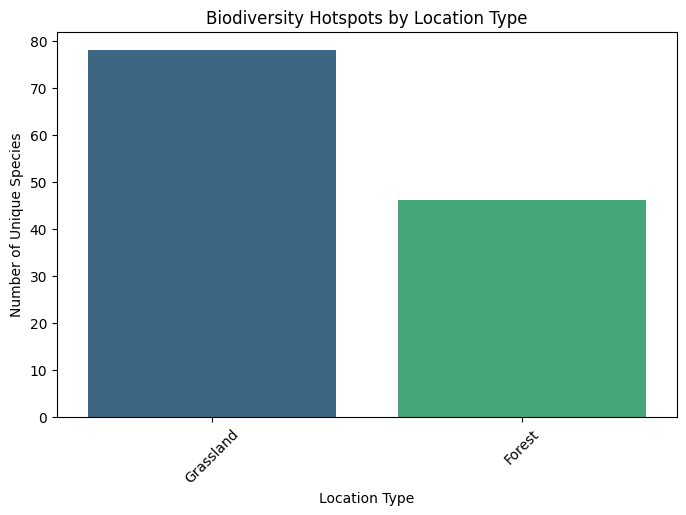

In [ ]:
# Group by Location_Type and count unique species
hotspot_df = combined_df.groupby('Location_Type')['Common_Name'].nunique().reset_index()
hotspot_df = hotspot_df.rename(columns={'Common_Name': 'Unique_Species_Count'})

# Sort by species count (descending)
hotspot_df = hotspot_df.sort_values(by='Unique_Species_Count', ascending=False)

# Plot the biodiversity hotspots
plt.figure(figsize=(8, 5))
sns.barplot(data=hotspot_df, x='Location_Type', y='Unique_Species_Count', palette="viridis")
plt.title('Biodiversity Hotspots by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. Grasslands host the highest biodiversity, with approximately 78 unique bird species, making them the richest habitat type in this dataset.

2. Forests support around 46 unique species, indicating a notable but lower diversity compared to grasslands.



# **Compare observations across different Plot_Name to see which plots attract more species or specific kinds of birds.**

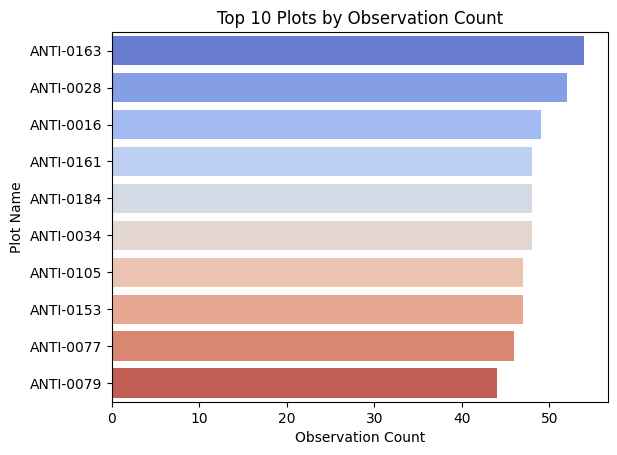

In [ ]:
top_plots = combined_df['Plot_Name'].value_counts().head(10)
sns.barplot(x=top_plots.values, y=top_plots.index, palette="coolwarm")
plt.title('Top 10 Plots by Observation Count')
plt.xlabel('Observation Count')
plt.ylabel('Plot Name')
plt.show()

# **Findings-**

1. ANTI-0163 recorded the highest number of bird observations, making it the most active plot in the dataset.

2. ANTI-0028 and ANTI-0016 followed closely, indicating strong bird activity in these areas as well.

# **Species Analysis**

# **Count unique species (Scientific_Name) observed and their distribution across Location_Type.**

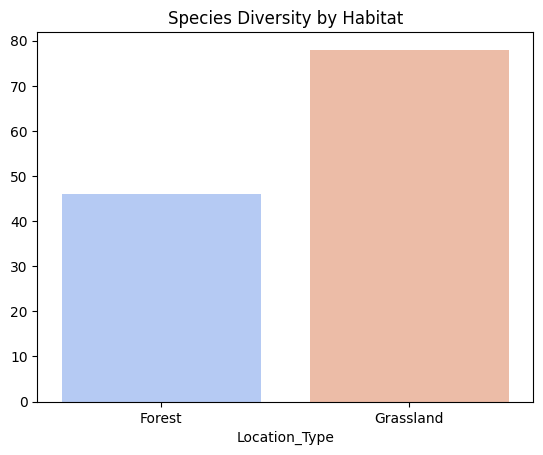

In [ ]:
species_diversity = combined_df.groupby('Location_Type')['Scientific_Name'].nunique()
sns.barplot(x=species_diversity.index, y=species_diversity.values, palette="coolwarm")
plt.title('Species Diversity by Habitat')
plt.show()

# **Findings-**

1. Grasslands show the highest species diversity, with around 78 unique bird species recorded.

2. Forests have a lower diversity count of approximately 46 unique species.

# **Check the Interval_Length and ID_Method columns to identify the most common activity types**

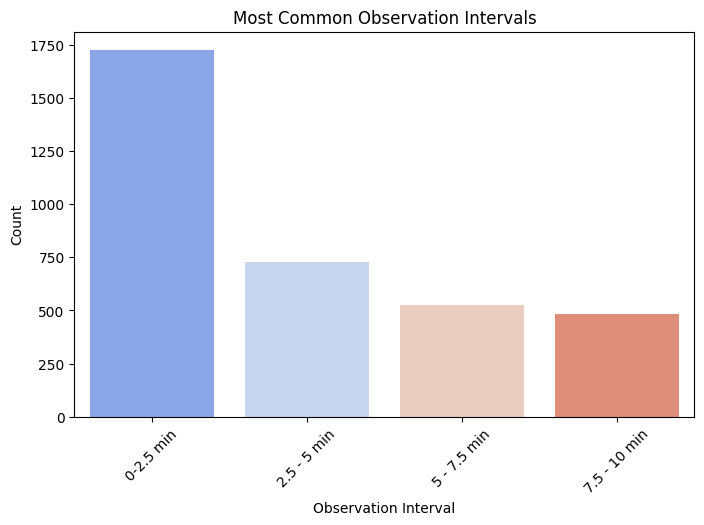

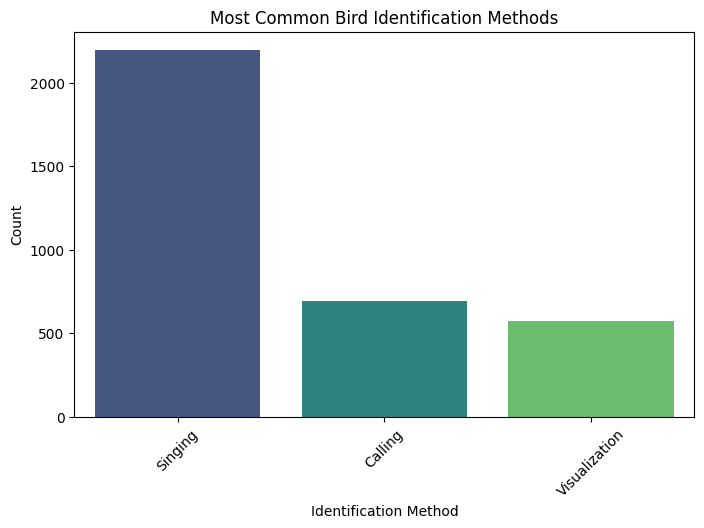

In [ ]:
# Remove 'Unknown' from ID_Method
filtered_df = combined_df[combined_df['ID_Method'].str.lower() != 'unknown']

# Most common observation intervals
interval_counts = filtered_df['Interval_Length'].value_counts().reset_index()
interval_counts.columns = ['Interval_Length', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=interval_counts, x='Interval_Length', y='Count', palette='coolwarm')
plt.title('Most Common Observation Intervals')
plt.xlabel('Observation Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Most common identification methods (without 'Unknown')
id_method_counts = filtered_df['ID_Method'].value_counts().reset_index()
id_method_counts.columns = ['ID_Method', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=id_method_counts, x='ID_Method', y='Count', palette='viridis')
plt.title('Most Common Bird Identification Methods')
plt.xlabel('Identification Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. The most common interval used was 0–2.5 minutes, with a much higher frequency than all other intervals.

2. Longer intervals, such as 2.5–5 minutes, 5–7.5 minutes, and 7.5–10 minutes, were used progressively less often.

3. Singing is the most widely used bird identification methods as compared to calling and visualization

# **Analyze the Sex column to understand the male-to-female ratio for different species.**

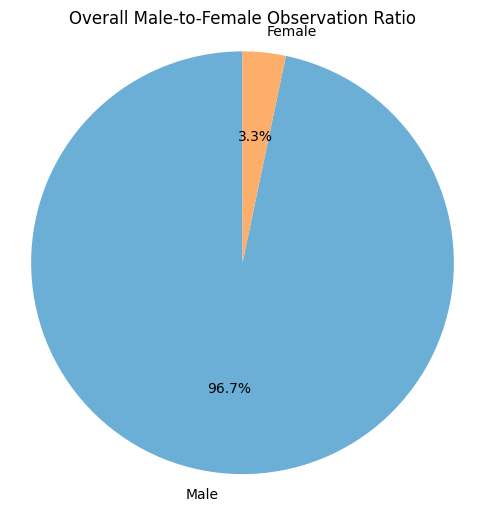

In [ ]:
# Filter only Male and Female (exclude Undetermined or blanks)
sex_filtered_df = combined_df[combined_df['Sex'].isin(['Male', 'Female'])]

# Count occurrences
sex_counts = sex_filtered_df['Sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts,
        labels=sex_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#6BAED6', '#FDAE6B'])
plt.title('Overall Male-to-Female Observation Ratio')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()

# **Findings-**

1. Male birds dominate the recorded observations, making up 96.7% of all identified individuals.

2. Female birds account for only 3.3% of observations, indicating a highly skewed dataset.

# **Environmental Conditions**-

# **Explore how Temperature, Humidity, Sky, and Wind impact observations, such as the number of birds or their distances.**

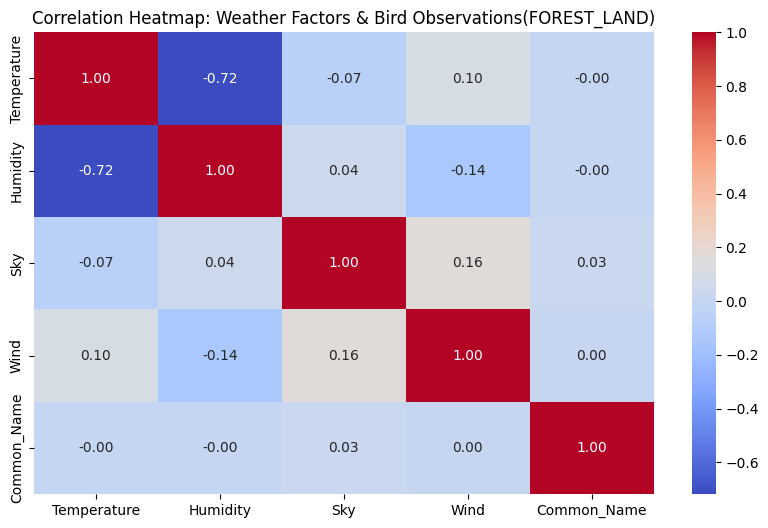

In [ ]:
# For forest

label_enc = LabelEncoder()
combined_df['Common_Name'] = label_enc.fit_transform(combined_df['Common_Name'])
combined_df['Sky'] = label_enc.fit_transform(combined_df['Sky'])
combined_df['Wind'] = label_enc.fit_transform(combined_df['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name', ]

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Weather Factors & Bird Observations(FOREST_LAND)")
plt.show()

# **Findings-**

1. Temperature and Humidity show a strong negative correlation (-0.72), meaning higher temperatures tend to be associated with lower humidity levels.

2. Sky and Wind have a low positive correlation (0.16), suggesting a weak relationship between sky conditions and wind intensity.

3. Temperature has almost no correlation with Sky (-0.07) and a very weak positive correlation with Wind (0.10), indicating these factors vary mostly independently.

4. Humidity has a weak negative correlation with Wind (-0.14) and almost no relationship with Sky (0.04).

5. Common_Name (encoded bird species) shows negligible correlation with all weather factors, suggesting that species occurrence in forest land is not strongly influenced by these individual variables in isolation.

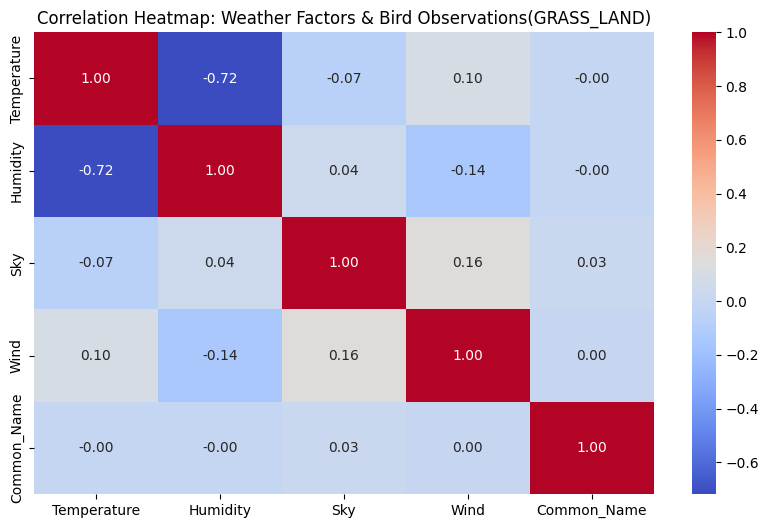

In [ ]:
# For grassland

label_enc = LabelEncoder()
combined_df['Common_Name'] = label_enc.fit_transform(combined_df['Common_Name'])
combined_df['Sky'] = label_enc.fit_transform(combined_df['Sky'])
combined_df['Wind'] = label_enc.fit_transform(combined_df['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name', ]

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Weather Factors & Bird Observations(GRASS_LAND)")
plt.show()

# **Findings**-

1. Temperature and Humidity again show a strong negative correlation (-0.72), meaning hotter conditions are linked to lower humidity levels in grasslands.

2. Sky and Wind have a weak positive correlation (0.16), suggesting a slight tendency for certain sky conditions to occur with stronger winds.

3. Temperature shows minimal correlation with Sky (-0.07) and a very weak positive link with Wind (0.10), indicating mostly independent variation.

4. Humidity has a weak negative correlation with Wind (-0.14) and almost no correlation with Sky (0.04).

5. Common_Name (bird species encoded numerically) has near-zero correlation with all weather factors, indicating no direct one-to-one relationship between species occurrence and single weather variables in grasslands.

# **Assess the impact of Disturbance (e.g., slight effect) on bird sightings.**

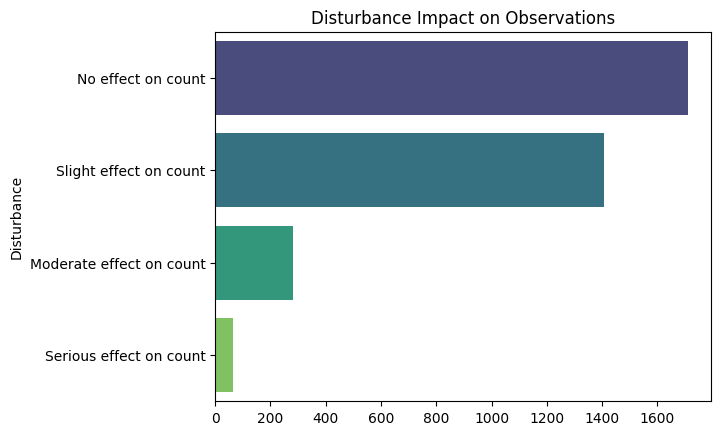

In [ ]:
disturbance_counts = combined_df['Disturbance'].value_counts()
sns.barplot(x=disturbance_counts.values, y=disturbance_counts.index, palette="viridis")
plt.title('Disturbance Impact on Observations')
plt.grid(False)
plt.show()

# **Findings-**

**1. Predominant Category – No Effect on Count**

The majority of bird sighting observations fall under the "No effect on count" category.
This suggests that in most cases, disturbances did not visibly alter the recorded number of birds.

**2. Second Highest – Slight Effect on Count**

The "Slight effect on count" category is the second most frequent, showing a notable portion of cases where disturbance caused minor changes in observation counts.

**3. Lower Frequency – Moderate Effect on Count**

A smaller proportion of observations show a "Moderate effect on count", indicating that more significant impacts from disturbance are less common.

**4. Rare – Serious Effect on Count**

The "Serious effect on count" category is the least frequent, highlighting that strong disturbance effects on bird sightings are rare in the dataset.

# **Distance and behavior**

# **Evaluate the Distance column to identify species typically observed closer or farther from the observer.**


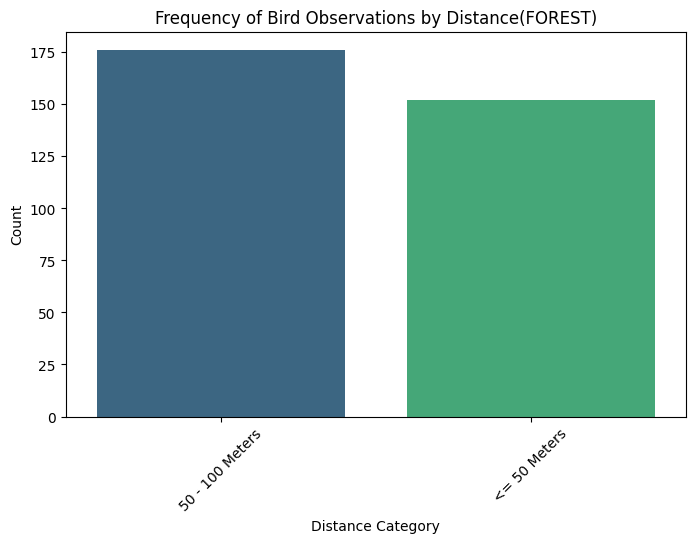

In [ ]:
# Filter data for 'Forest' location type
forest_df_filtered = combined_df[combined_df['Location_Type'] == 'Forest']

# Filter out 'Unknown' distances
forest_df_filtered = forest_df_filtered[forest_df_filtered['Distance'] != 'Unknown']

plt.figure(figsize=(8, 5))
sns.countplot(data=forest_df_filtered, x="Distance", order=forest_df_filtered["Distance"].value_counts().index, palette="viridis")
plt.title("Frequency of Bird Observations by Distance(FOREST)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. Most forest bird observations occurred at 50–100 meters, indicating many species are detected at a moderate distance from the observer.

2. Slightly fewer observations were made at ≤ 50 meters, suggesting fewer species are typically seen very close compared to mid-range distances.

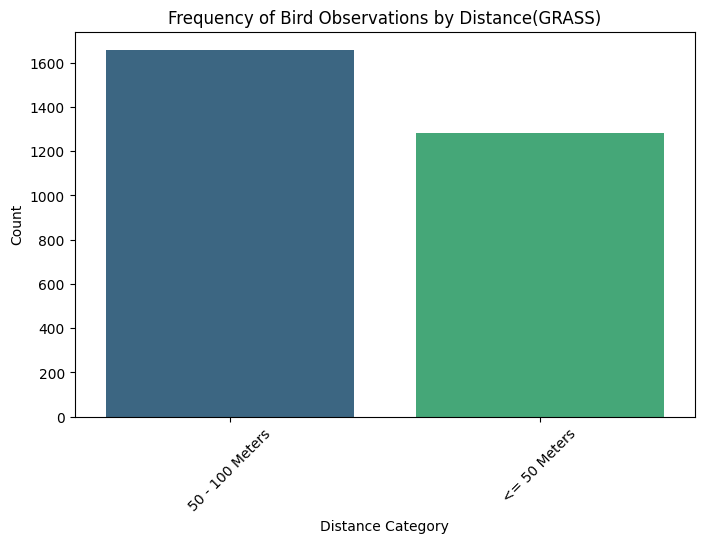

In [ ]:
# Filter data for 'Forest' location type
grass_df_filtered = combined_df[combined_df['Location_Type'] == 'Grassland']

# Filter out 'Unknown' distances
grass_df_filtered = grass_df_filtered[grass_df_filtered['Distance'] != 'Unknown']

plt.figure(figsize=(8, 5))
sns.countplot(data=grass_df_filtered, x="Distance", order=grass_df_filtered["Distance"].value_counts().index, palette="viridis")
plt.title("Frequency of Bird Observations by Distance(GRASS)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. Majority of bird observations occurred at 50–100 meters, suggesting species in grasslands are more often detected at mid-range distances.

2. Fewer observations were made at ≤ 50 meters, indicating closer encounters are less common compared to forested areas of similar category counts.

# **Examine the Flyover_Observed column to detect trends in bird behavior during observation.**

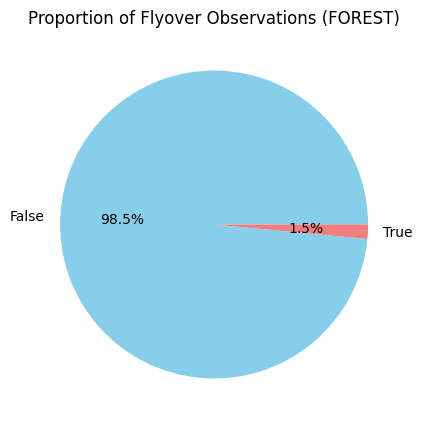

In [ ]:
plt.figure(figsize=(5, 5))
combined_df[combined_df['Location_Type'] == 'Forest']["Flyover_Observed"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Proportion of Flyover Observations (FOREST)")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()

# **Findings-**

1. Vast majority (98.5%) of observations were not flyovers, meaning most birds were perched, foraging, or stationary during detection.

2. Only 1.5% of sightings were flyovers, suggesting in-forest bird monitoring rarely captures birds in transit overhead.

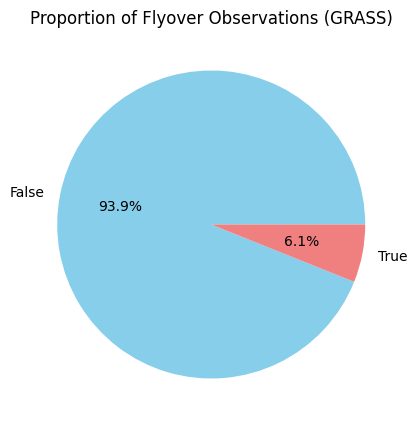

In [ ]:
plt.figure(figsize=(5, 5))
combined_df[combined_df['Location_Type'] == 'Grassland']["Flyover_Observed"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Proportion of Flyover Observations (GRASS)")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()

# **Findings-**

1. Most observations (93.9%) were not flyovers, meaning birds were detected while stationary or engaged in local activities.

2. Flyovers accounted for 6.1% of sightings, which is notably higher than in forest areas, suggesting birds in grasslands are more frequently observed in transit overhead.

# **Observer Trends**

# **Analyze data by Observer to check if specific individuals report more observations or certain species.**


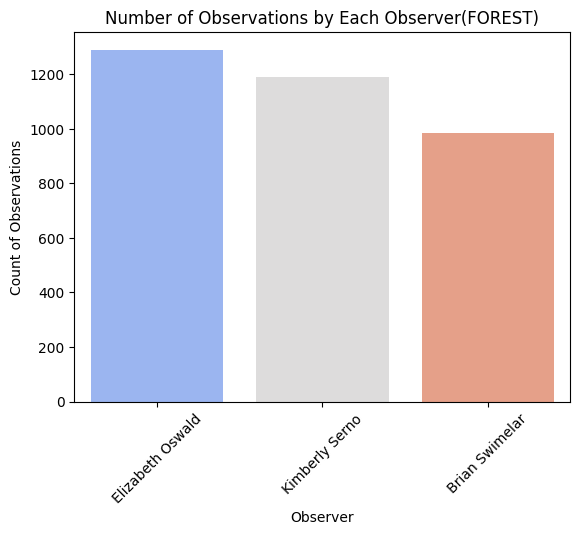

In [ ]:
observer_counts = combined_df['Observer'].value_counts().head(10).reset_index()
observer_counts.columns = ['Observer', 'Count']
sns.barplot(data=observer_counts, x="Observer", y="Count", palette="coolwarm")
plt.title("Number of Observations by Each Observer(FOREST)")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. Elizabeth Oswald recorded the highest number of observations, exceeding 1,280 sightings.

2. Kimberly Semo closely followed with just under 1,200 observations.

3. Brian Swimelar had the fewest forest observations, with just under 1,000 sightings.

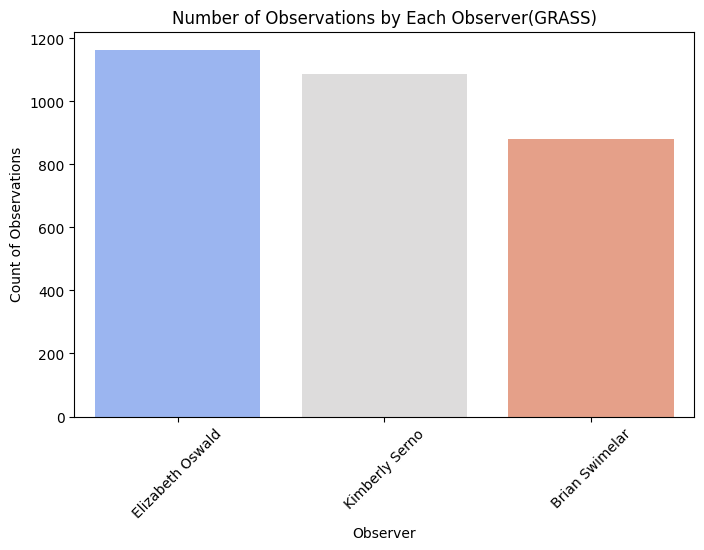

In [ ]:
# Filter data for 'Grassland' location type
grassland_df_filtered = combined_df[combined_df['Location_Type'] == 'Grassland']

plt.figure(figsize=(8, 5))
sns.countplot(data=grassland_df_filtered, x="Observer", order=grassland_df_filtered["Observer"].value_counts().index, palette="coolwarm")
plt.title("Number of Observations by Each Observer(GRASS)")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. Elizabeth Oswald recorded the highest number of grassland observations, with about 1,170 sightings.

2. Kimberly Semo followed closely, logging around 1,090 observations.

3. Brian Swimelar had the fewest grassland observations, with roughly 880 sightings.

# **Evaluate the Visit column to see how repeated visits affect species count or diversity.**

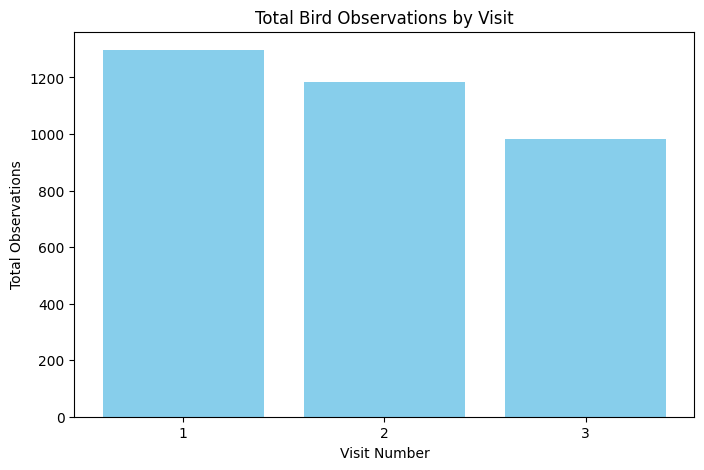

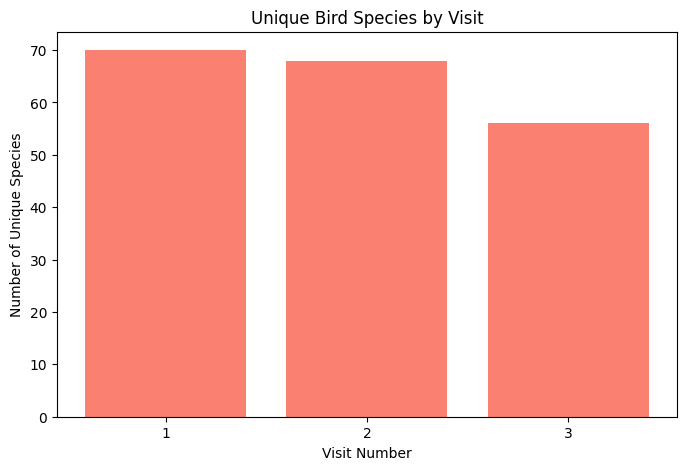

In [ ]:
# Group by Visit for total observations
visit_obs = combined_df.groupby('Visit')['Common_Name'].count().reset_index()
visit_obs.columns = ['Visit', 'Total_Observations']

# Group by Visit for unique species diversity
visit_diversity = combined_df.groupby('Visit')['Common_Name'].nunique().reset_index()
visit_diversity.columns = ['Visit', 'Unique_Species']

# Merge both metrics
visit_stats = pd.merge(visit_obs, visit_diversity, on='Visit')

# Plot total observations
plt.figure(figsize=(8, 5))
plt.bar(visit_stats['Visit'], visit_stats['Total_Observations'], color='skyblue')
plt.title('Total Bird Observations by Visit')
plt.xlabel('Visit Number')
plt.ylabel('Total Observations')
plt.xticks(visit_stats['Visit'])
plt.show()

# Plot unique species diversity
plt.figure(figsize=(8, 5))
plt.bar(visit_stats['Visit'], visit_stats['Unique_Species'], color='salmon')
plt.title('Unique Bird Species by Visit')
plt.xlabel('Visit Number')
plt.ylabel('Number of Unique Species')
plt.xticks(visit_stats['Visit'])
plt.show()

# **Findings-**

1. Total observations were highest during the first visit (~1,300) and steadily declined in the second (~1,190) and third visits (~990).

2. Species diversity also decreased with repeated visits, from ~70 unique species in the first visit to ~56 in the third.

3. This pattern suggests that most species are detected early, with fewer new species appearing in later visits.

# **Conservation Insights**

# **Use the PIF_Watchlist_Status and Regional_Stewardship_Status to identify trends in species that are at risk or require conservation focus.**


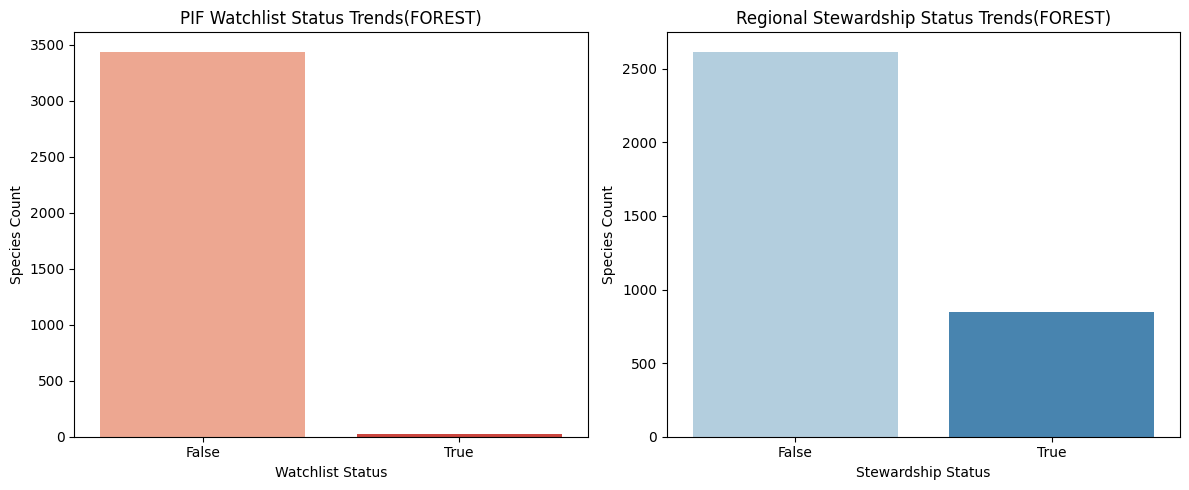

In [ ]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = combined_df["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = combined_df["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
plt.title("PIF Watchlist Status Trends(FOREST)")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends(FOREST)")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()

# **Findings-**

1. PIF Watchlist Status: Only a very small proportion of observations involve watchlist species, with the vast majority (over 99%) not on the PIF Watchlist.

2. Regional Stewardship Status: Around 25–30% of observations are of species with regional stewardship importance, while the majority (about 70–75%) are not.

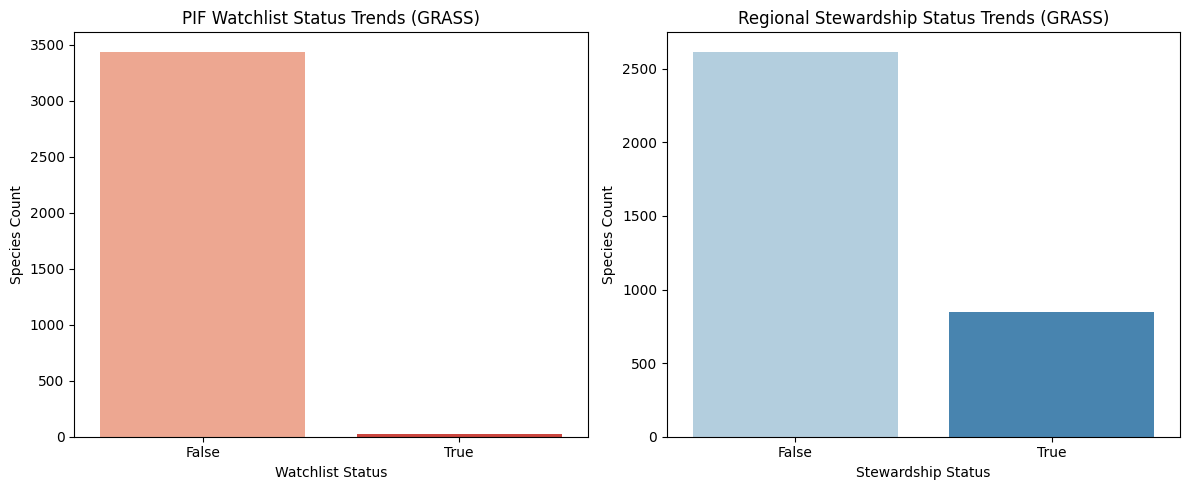

In [ ]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = combined_df["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = combined_df["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
plt.title("PIF Watchlist Status Trends (GRASS)")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends (GRASS)")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()

# **Findings-**

1. PIF Watchlist Status: Over 99% of grassland observations are of species not on the PIF Watchlist, with only a very small fraction flagged as watchlist species.

2. Regional Stewardship Status: Around 24–26% of grassland observations involve species with regional stewardship importance, while the majority (~74–76%) are not classified under this status.

# **Study the distribution of species based on their AOU_Code to correlate with regional or national conservation priorities.**

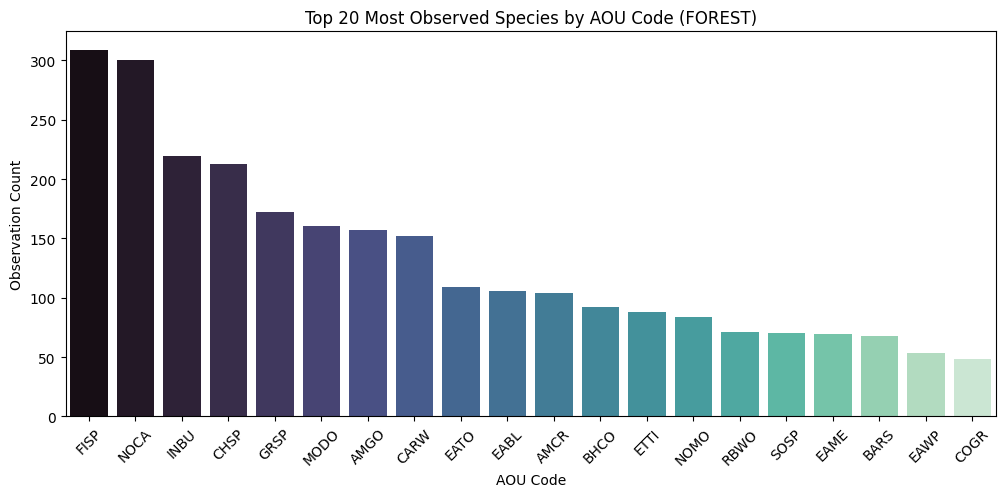

In [ ]:
# Count the occurences of each AOU_code
aou_counts = combined_df["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Plot distribution of AOU Codes
plt.figure(figsize=(12, 5))
sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")
plt.title("Top 20 Most Observed Species by AOU Code (FOREST)")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. FISP and NOCA are the most observed species in forest areas, each with around 300+ sightings, standing out significantly above the rest.

2. INBU and CHSP also have high observation counts, both exceeding 210 sightings, indicating they are common in this habitat.

3. The remaining species show a gradual decline in counts, with COGR having the lowest among the top 20 at under 50 sightings.



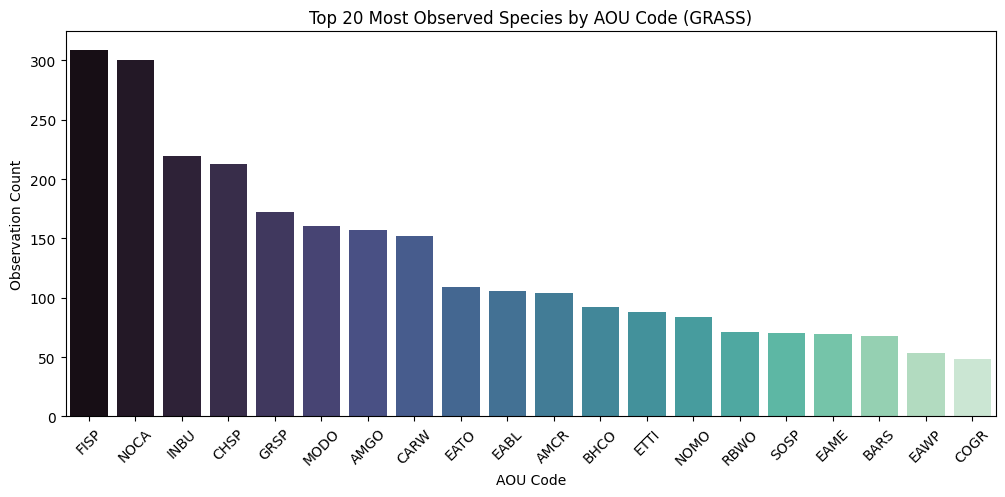

In [ ]:
# Count the occurrences of each AOU Code
aou_counts = combined_df["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Plot distribution of AOU Codes
plt.figure(figsize=(12, 5))
sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")
plt.title("Top 20 Most Observed Species by AOU Code (GRASS)")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. FISP and NOCA dominate grassland observations, each with over 300 sightings, making them the most frequently recorded species.

2. INBU and CHSP follow with observation counts exceeding 210, indicating they are also common in grassland habitats.

3. The remaining species show a gradual decline in frequency, with COGR being the least observed among the top 20, with under 50 sightings.

# **Conclusion and Recommendations-**

**Conclusion-**

The analysis shows most bird observations occur at 50–100 meters, with flyovers more common in grasslands than forests. First visits yield the highest diversity, while repeated visits show diminishing returns. PIF Watchlist species are rare, but regional stewardship species form a significant share. FISP and NOCA dominate sightings in both habitats, indicating their abundance and adaptability.

**Recommendations-**

1. Prioritize survey resources for first-visit efforts, as they yield the highest diversity and total observations.

2. Adopt standardized distance estimation techniques to improve accuracy and minimize “unknown” distance entries.

3. Implement habitat-specific detection strategies, such as increased overhead scanning in grasslands to capture more flyovers.

4. Provide observer training to reduce variation in detection rates and ensure data consistency across surveyors.

5. Develop targeted monitoring programs for PIF Watchlist species, focusing on optimal habitats and seasons for detection.

6. Allocate additional resources to regional stewardship species, given their ecological and conservation importance.